## Calculus of variations on a computer


We can find the function $y$ that minimizes the integral

$$ \int f(x, y, y') dx $$
         
We find this by discretizing the integral and miniziming a multivariate sum and find the optimal $y$ vector.
         
The gradient for the optimization is found using the Euler-Lagange formula

$$ f_y -  \frac{d}{dx} f_{y'}$$



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,cdist
from scipy.optimize import fmin_tnc as tnc

### The path of shortest length between two points

The integral to be minimized is the arc length

$$ \int \sqrt{1 +{y'}^2} dx$$



In [20]:
N = 100
x = np.linspace(0, 10, N)
y = np.linspace(0, 10, N-2)
delta_x = x[1]-x[0]

BC_0 = 12
BC_1 = 0

def f(x, y, y_prime):
    return np.sqrt(1+y_prime**2)

def g_1(x, y, y_prime):
    return 0

def g_2(x, y, y_prime):
    return y_prime/np.sqrt(1+y_prime**2)
    
def integrand(y):
    y = np.r_[BC_0, y, BC_1]
    sum_value = 0
    for i in range(1, len(y)):
        k = f(x[i], y[i], (y[i]-y[i-1])/delta_x)*delta_x
        sum_value += k
    return sum_value

def gradient(y):
    y = np.r_[BC_0, y, BC_1]
    grad = []
    for i in range(1,len(y)-1):
        value = g_1(x[i], y[i], (y[i]-y[i-1])/delta_x)*delta_x+ g_2(x[i], y[i], (y[i]-y[i-1])/delta_x)- g_2(x[i], y[i], (y[i+1]-y[i])/delta_x)
        grad += [value]
    return grad

Scipy's truncated newton is used as the optimization algorithm

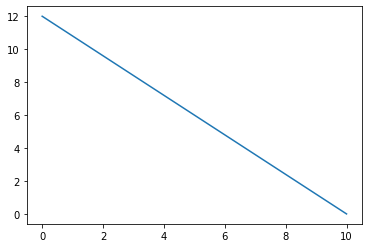

In [21]:
ans = tnc(integrand,y, fprime = gradient)
plt.plot(x, np.r_[BC_0, ans[0], BC_1])

The shortest path between two points (on a plane) is a straight line.

### The path of quickest descent - the brachistrochrone

The integral to be minimized is the arc length

$$ \int \sqrt{1 +{y'}^2} dx$$
                  
        

In [93]:
N = 100
x = np.linspace(0, 10, N)
y = 10*np.linspace(1, 2, N-2)
delta_x = x[1]-x[0]

BC_0 = 10
BC_1 = 7

def f(x, y, y_prime):
    if (1+y_prime**2)/y<0:
        print(y)
    return np.sqrt((1+y_prime**2)/y)

def g_1(x, y, y_prime):
    return -0.5*np.sqrt((1+y_prime**2)/y)/y

def g_2(x, y, y_prime):
    return y_prime/np.sqrt(y*(1+y_prime**2))
    
def integrand(y):
    y = np.r_[BC_0, y, BC_1]
    sum_value = 0
    for i in range(1, len(y)):
        k = f(x[i], y[i], (y[i]-y[i-1])/delta_x)*delta_x
        sum_value += k
    return sum_value

def gradient(y):
    y = np.r_[BC_0, y, BC_1]
    grad = []
    for i in range(1,len(y)-1):
        value = g_1(x[i], y[i], (y[i]-y[i-1])/delta_x)*delta_x+ g_2(x[i], y[i], (y[i]-y[i-1])/delta_x)- g_2(x[i], y[i], (y[i+1]-y[i])/delta_x)
        grad += [value]
    return grad

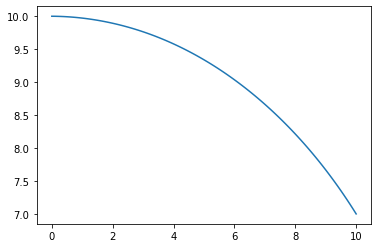

In [94]:
bounds_list = [(0.001, 1000) for i in range(len(y))]
ans = tnc(integrand,y, fprime = gradient, bounds = bounds_list)
plt.plot(x, np.r_[BC_0, ans[0], BC_1])
#plt.hist(g2

This is a cycloid!!!

### Queen Dido's proble,m

Minimizing the integral

$$ \int ydx + \lambda \sqrt{1+ {y'}^2 }dx$$

which is finding the maximal area subject to a constant arc length

In [69]:
N = 100
x = np.linspace(0, 10, N)
y = np.linspace(0.12, 1, N-2)
delta_x = x[1]-x[0]

BC_0 = 1
BC_1 = 1

lambda_value = 10

def f(x, y, y_prime):
    return y + lambda_value*np.sqrt(1+y_prime**2)

def g_1(x, y, y_prime):
    return 1

def g_2(x, y, y_prime):
    return lambda_value*y_prime/np.sqrt(1+y_prime**2)
    
def integrand(y):
    y = np.r_[BC_0, y, BC_1]
    sum_value = 0
    for i in range(1, len(y)):
        k = f(x[i], y[i], (y[i]-y[i-1])/delta_x)*delta_x
        sum_value += k
    return sum_value

def gradient(y):
    y = np.r_[BC_0, y, BC_1]
    grad = []
    for i in range(1,len(y)-1):
        value = g_1(x[i], y[i], (y[i]-y[i-1])/delta_x)*delta_x+ g_2(x[i], y[i], (y[i]-y[i-1])/delta_x)- g_2(x[i], y[i], (y[i+1]-y[i])/delta_x)
        grad += [value]
    return grad

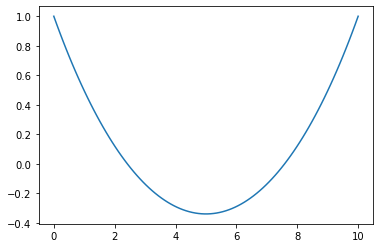

In [70]:
ans = tnc(integrand,y, fprime = gradient)
plt.plot(x, np.r_[BC_0, ans[0], BC_1])

The curve of maximum area with a fixed arc length is a circle.